In [1]:
import matplotlib.pyplot as plt
import numpy as np

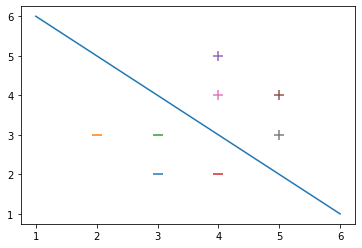

In [17]:
# girdi veri seti
# 8 satır ve 2 sutündan oluşmakta
x = np.array([
        [3, 2],
        [2, 3],
        [3, 3],
        [4, 2],
        [4, 5],
        [5, 4],
        [4, 4],
        [5, 3]
             ])

# çıktı değişkeninin 8 değeri bulunmakta
y = np.array([-1, -1, -1, -1, 1, 1, 1, 1])

# çıktı değişkenleri girdi üzerinde gösteren plot
# eğer -1'e eşitse girdinin gösterimi "-" ile
# eğer 1'e eşitse girdinin gösterimi "+" olarak gösterilir.
for index, deger in enumerate(x):
    if y[index] == -1:
        plt.scatter(deger[0], deger[1] 
                    ,s=100, marker='_'
                    ,linewidths=5)
    else:
        plt.scatter(deger[0], deger[1]
                    ,s=100, marker='+'
                    ,linewidths=5)

# varsayımsal SVM plot
plt.plot([1, 6],
         [6, 1])

plt.show()

In [18]:
# sentetik veri seti
from sklearn.datasets import make_blobs

# iki merkezli 50 örnekli veri seti
x, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

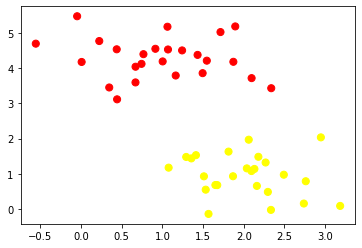

In [19]:
# veri setinin gösterimi
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plt.show()

In [20]:
from sklearn.svm import SVC

# model oluşturma
model = SVC(kernel='linear', C=1E10)
model.fit(x, y)

# katsayılar
print(model.coef_)

[[ 0.23525694 -1.41250783]]


In [21]:
def svm_grafik_karar_fonksiyonu(model, ax=None, plot_support=True):
    """
    :param model: çalışılan model değişkeni
    :param ax: plot düzlemi
    :param plot_support: destek vektör olacak mı?
    :return: plot gösterimi
    """
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()


    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)

    Y, X = np.meshgrid(y, x)

    xy = np.vstack([X.ravel(), Y.ravel()]).T

    P = model.decision_function(xy).reshape(X.shape)

    # karar sınırları ve boşluğun görseli
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # destek vektörlerinin plotu
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.show()


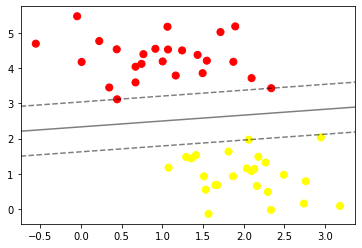

In [22]:
# girdi değişkenlerin scatter plot gösterimi
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

# grafiğin çalıştırılması
svm_grafik_karar_fonksiyonu(model)

## Doğrulsak Olmayan

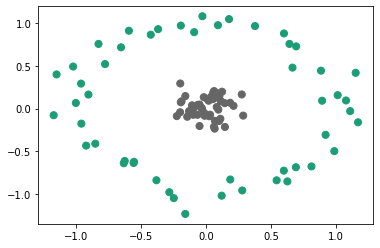

In [23]:
# İçe içe geçen daire şeklinde sentetik veri
from sklearn.datasets import make_circles

# 100 adet satır ve 2 merkezli veri
X, y = make_circles(100, factor=.1, noise=.1)

# scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
plt.show()

In [24]:
y.shape

(100,)

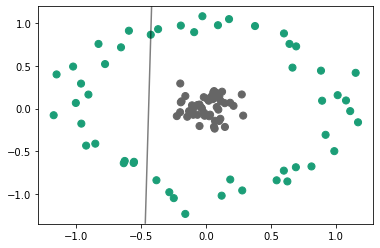

In [25]:
# modeli oluşturuyoruz
model_2 = SVC(kernel='linear').fit(X, y)

# girdi değişkenlerin scatter plot gösterimi
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')

# grafiğin çalıştırılması
# bu sefer destek plotu göstermiyoruz
svm_grafik_karar_fonksiyonu(model=model_2, plot_support=False)

In [26]:
def plot_3D(x=x, y=y):
    r = np.exp(-(x ** 2).sum(1))

    ax = plt.subplot(projection='3d')

    ax.scatter3D(x[:, 0], x[:, 1], r, c=y, s=50, cmap='Dark2')

    ax.view_init(elev=30, azim=30)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
    plt.show()

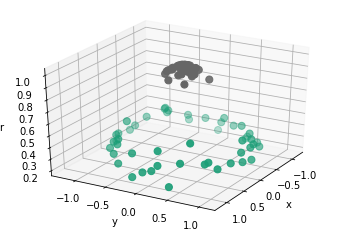

In [27]:
plot_3D(X,y)

In [28]:
model_rbf = SVC(kernel='rbf', C=1E6)
model_rbf.fit(X, y)

SVC(C=1000000.0)

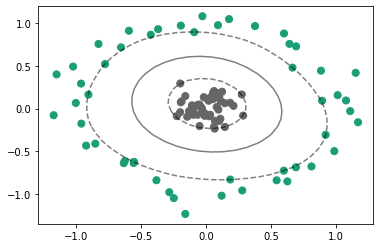

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')

plt.scatter(model_rbf.support_vectors_[:, 0], model_rbf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

svm_grafik_karar_fonksiyonu(model_rbf)

In [30]:
print(SVC().get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


**C:** Düzenlileştirme (Regularization) parametresi. C ile ters orantılıdır. Kesinlikle pozitif bir sayı olmalıdır.

**Kernel:** Bu parametrenin aldığı değerler {`linear`, `poly`, `rbf`, `sigmoid`, `precomputed`} olup yukarıda linear ve RBF yöntemlerini incelenmiştir.

**Degree:** Eğer kernel yöntem olarak polinom (“poly”) kullanımı varsa bu parametre polinom derecesinin belirlenmesi içindir.

**Gamma:** Daha düşük bir Gamma değeri, eğitim veri kümesine seyrek olacak şekilde uyarken, daha yüksek bir gamma değeri ise eğitim veri kümesine tam olarak uymakta ve bu durum aşırı öğrenmeye (overfitting) neden olabilmektedir. Başka bir deyişle, düşük bir gamma değeri ayırma çizgisini hesaplarken yalnızca yakın noktaları dikkate alır. Diğer yandan yüksek bir gama değeri ayırma çizgisinin hesaplanmasında tüm veri noktalarını dikkate alır diyebilirsiniz.